In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path=r"J:\Downloads\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [5]:
wage_dats=visa_df["prevailing_wage"]
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
# Step-2:
IQR= q3-q1
# Step-3:
lb= q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4:
con1=wage_data<lb # T F
con2=wage_data>ub # T F
con3=con1|con2

# Bitwise operators used to compare
# Bits data === 0 and 1 == True false
#Step-3:
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [4]:
wage_data=visa_df["prevailing_wage"]
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
# Step-2:
IQR= q3-q1
# Step-3:
lb= q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4:
con1=wage_data>lb # T F
con2=wage_data<ub # T F
con3=con1&con2

# Bitwise operators used to compare
# Bits data === 0 and 1 == True false
#Step-3:
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


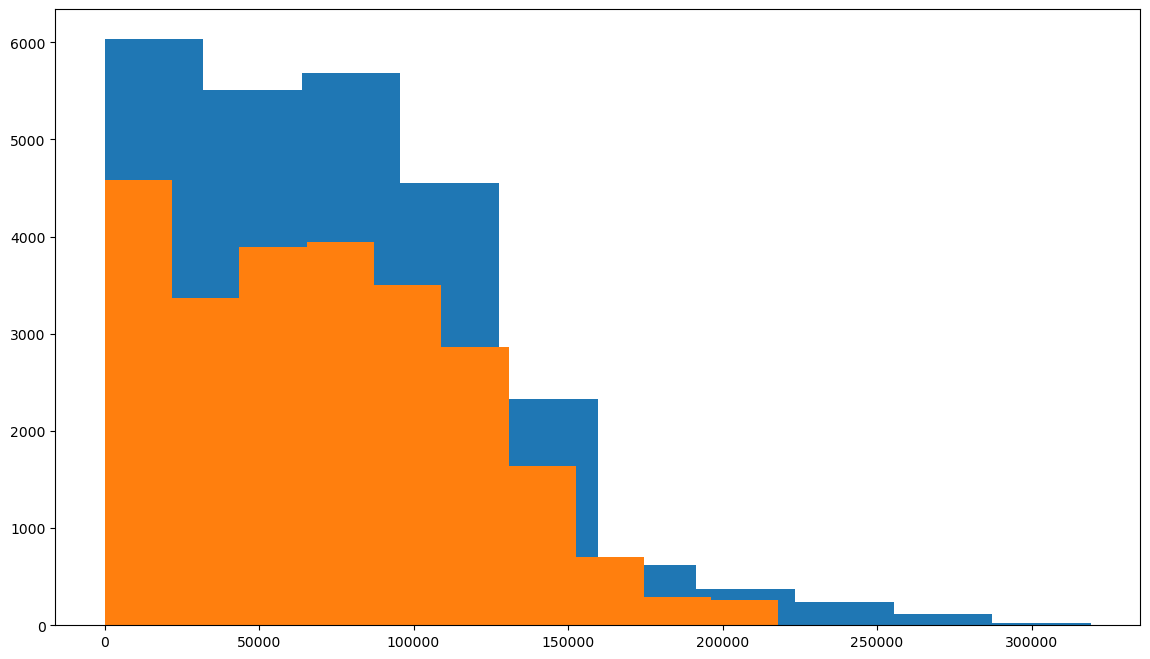

In [6]:
wage_non_outlier=non_outliers_df["prevailing_wage"]
wage_data=visa_df["prevailing_wage"]
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_non_outlier)
plt.show()

- **how to deal with outlier**

- 2.fill the median value
   - we already know that outliers does not affect by median
   - so it is the best practice to fill the outlier with median
- 3.capping or filtering
   - insted of filling with median
   - we can  fill with certain vlaues
   - the outliers which are less than LB FILL with LB values
   - the outliers which are greater than UB fill with UB values
- **Isolation Forest**
   - is ML model used to find the outlier and anamolies

**fill mith median value**

**np.where**
- in numpy we have a method called **where**
- it takes three arguments
   - 1.condition
   - 2.values if condition is True
   - 3.values if condition is False

- it is applicable only for Binary means if and else 
 

In [7]:
list1=[]
for value in wage_data:
    if value < lb or value>ub:
        median=wage_data.median()
        list1.append(median)
    else:
        list1.append(value)

list1

[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 70308.20999999999,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 70308.20999999999,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34

In [8]:
dict1={"sub":['ds','de','cs'],
       'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,ds,100
1,de,200
2,cs,300


In [9]:
l=[]
for i in df.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)

df['marks']=l
df

,sub,marks
0,ds,100
1,de,1
2,cs,1


In [10]:
dict1={"sub":['ds','de','cs'],
       'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,ds,100
1,de,200
2,cs,300


In [11]:
con=df['marks']>100
l=np.where(con,1,df['marks'])
l
df['marks']=l
df

,sub,marks
0,ds,100
1,de,1
2,cs,1


In [12]:
wage_data=visa_df['prevailing_wage']
con1=wage_data<lb
con2=wage_data>ub
con=con1 | con2
wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [13]:
visa_df['prevailing_wage_update']=l


(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

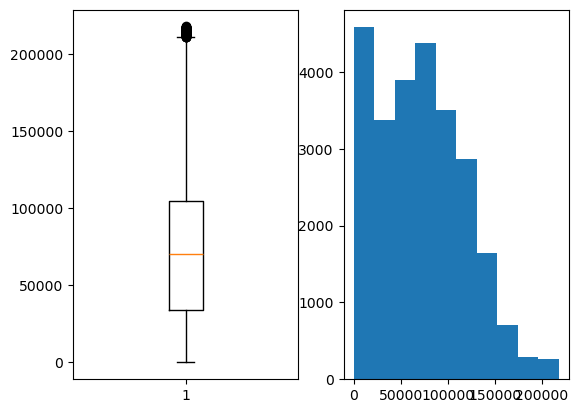

In [14]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])

In [15]:
cat_columns=visa_df.select_dtypes(include='object').columns 
num_columns=visa_df.select_dtypes(exclude='object').columns 


**Bi variate analysis** 

- We already seen Uni variate analysis 
- We performed the categorical columns analysis 
- Frequency table (Value counts) 
- Bar chart 
- Relative frequency table (Value counts Normalized form) 
- Pie chart 
-We performed the numerical column analysis 
- Histogram 
- Distribution plots 
- Box plot 
- Outlier analysis 
- Filling the outliers 
- Now we will do Categorical-Categorical Analaysis 
- Numerical - Numerical analayis 
- Categorical - Numerical analysis
-  
**Categorical-Categorical** 
- Lets consider two columns 
- Continent 
- Case status


In [16]:
visa_df['continent'].value_counts() 

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [18]:
visa_df['case_status'].value_counts() 

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task** 
- Find the Certified observations continent wise 
- Find the Denied observations continent wise 


In [20]:
# Step-1: Make the first condition Continet=='Asia' 
# Step-2: Make the second condition case_status=='Certified' # Step-3: Make the Third condition: con1&con2 
# Step-4: Then retrive the dataframe and take the count 
con1=visa_df['continent']=='Asia' 
con2=visa_df['case_status']=='Certified'
con3=con1&con2 
len(visa_df[con3])

11012

In [22]:
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [24]:
continents=visa_df['continent'].unique() 
certified_list=[] 
for i in continents: 
 con1=visa_df['continent']==i 
 con2=visa_df['case_status']=='Certified' 
 con3=con1&con2 
 count=len(visa_df[con3]) 
 print(f"the number of certified visa from {i} is: {count}")  
certified_list.append(count) 


the number of certified visa from Asia is: 11012
the number of certified visa from Africa is: 397
the number of certified visa from North America is: 2037
the number of certified visa from Europe is: 2957
the number of certified visa from South America is: 493
the number of certified visa from Oceania is: 122


In [26]:
continents=visa_df['continent'].unique() 
certified_list,denied_list=[],[] 
for i in continents: 
 con1=visa_df['continent']==i 
 con2=visa_df['case_status']=='Certified' 
 con3=visa_df['case_status']=='Denied' 
 cert_con=con1&con2 
 den_con=con1&con3 
 cert_count=len(visa_df[cert_con]) 
 den_count=len(visa_df[den_con]) 
 print(f"the number of certified visa from {i} is: {cert_count}")  
 print(f"the number of Denied visa from {i} is: {den_count}")  
 certified_list.append(cert_count) 
 denied_list.append(den_count) 

the number of certified visa from Asia is: 11012
the number of Denied visa from Asia is: 5849
the number of certified visa from Africa is: 397
the number of Denied visa from Africa is: 154
the number of certified visa from North America is: 2037
the number of Denied visa from North America is: 1255
the number of certified visa from Europe is: 2957
the number of Denied visa from Europe is: 775
the number of certified visa from South America is: 493
the number of Denied visa from South America is: 359
the number of certified visa from Oceania is: 122
the number of Denied visa from Oceania is: 70


In [28]:
continents 
certified_list 
cols=['Continents','Certified'] 
df1=pd.DataFrame(zip(continents,certified_list), columns=cols) 
df1


,Continents,Certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [29]:
cols=['Certified','Denied'] 
df3=pd.DataFrame(zip(certified_list,denied_list),index=continents, 
    columns=cols) 
df3 


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [31]:
#**Cross tab** 
#The above data frame we can make by using a method: cross tab It is available in pandas 
#It takes two argumenst 
#index 
#column 
#In above data frame index column is : continent 
#In above data frame Data column is : case_status 
idx_column=visa_df['continent'] 
data_column=visa_df['case_status'] 
df4=pd.crosstab(idx_column,data_column) 
df4 


case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

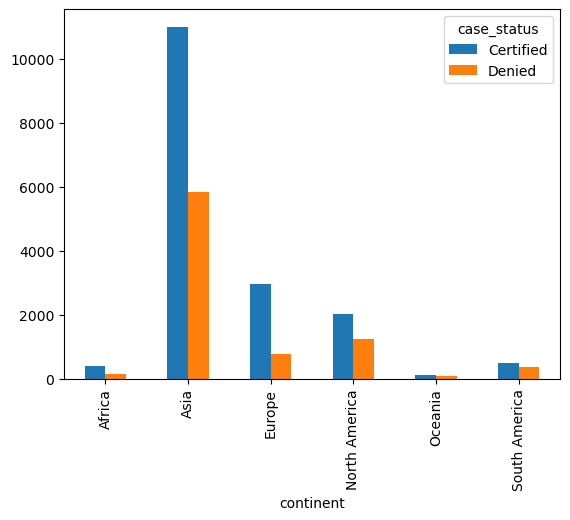

In [32]:
df4.plot(kind='bar')

<Axes: >

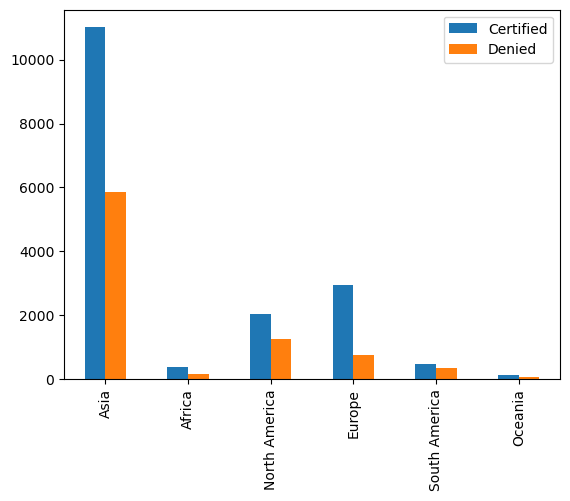

In [33]:
df3.plot(kind='bar')

**Multivariate analysis** 
- Education 
- continent 
- Case status 
- we already know from Asia there 11k Accepted visa
- In that I want furthur break down based on education - here also pd.cross tab 
 - first fix your index of any one column out of three column
 -  Then keep two column in a list and pass as data column 


In [34]:
idx_column=visa_df['continent'] 
data_column=[visa_df['education_of_employee'], 
 visa_df['case_status']] 
df5=pd.crosstab(idx_column,data_column) 
df5 


education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

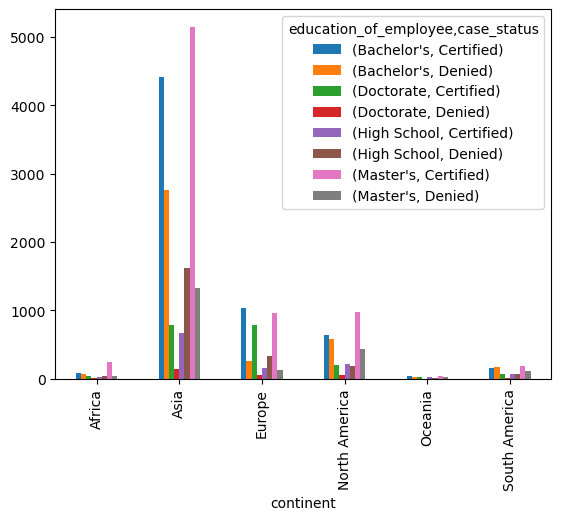

In [35]:
df5.plot(kind='bar') 


**Numerical vs Numerical**
- to understand numerical columns relation we need to plot scatter plots
- scatter plots gives the ralation between two numericsl columns
- bar chart-pie chart-

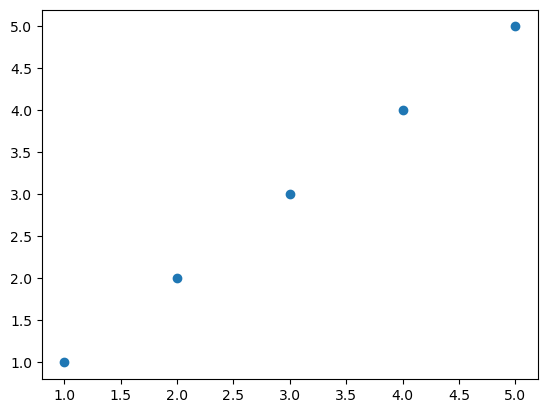

In [45]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.show()

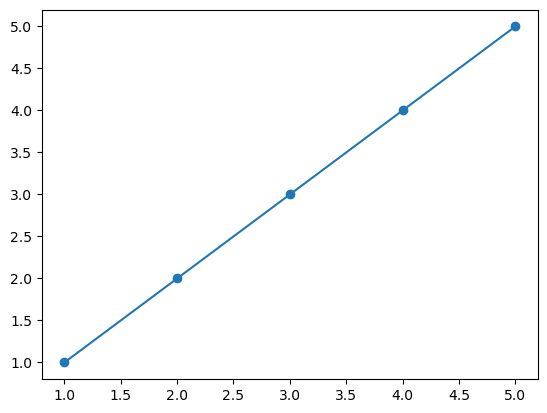

In [44]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)     # plot gives the line which connets the dots
plt.show()

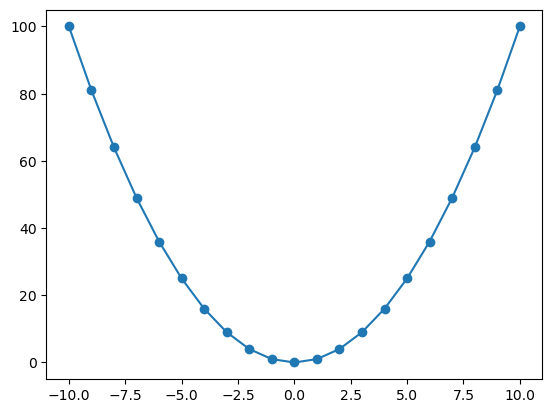

In [51]:
x=[i for i in range (-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)

In [52]:
pd.DataFrame(zip(x,y))

,0,1
0,-10,100
1,-9,81
2,-8,64
3,-7,49
4,-6,36
5,-5,25
6,-4,16
7,-3,9
8,-2,4
9,-1,1


In [46]:
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage',
       'prevailing_wage_update'],
      dtype='object')

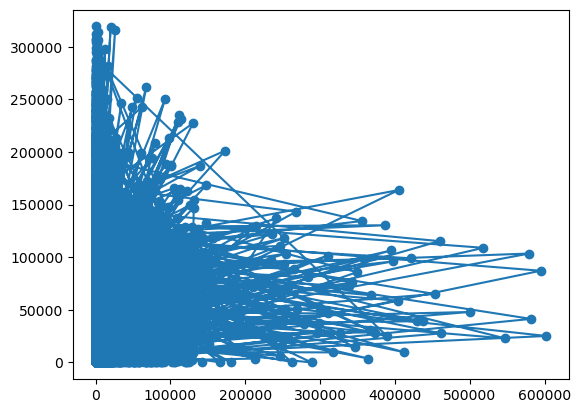

In [53]:
x=visa_df['no_of_employees']
y=visa_df['prevailing_wage']
plt.scatter(x,y)
plt.plot(x,y)

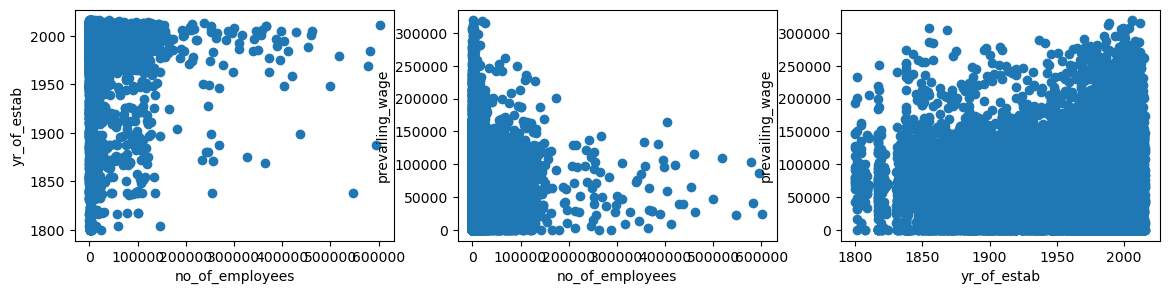

In [62]:
x=visa_df['no_of_employees']
y=visa_df['yr_of_estab']
z=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.subplot(1,3,1).scatter(x,y)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
#=========================================================
plt.subplot(1,3,2).scatter(x,z)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
#========================================================
plt.subplot(1,3,3).scatter(y,z)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')
plt.show()

**method name is: corr**

In [75]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


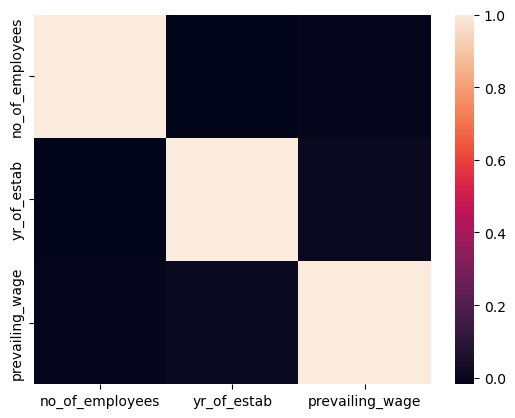

In [81]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data)
plt.show()

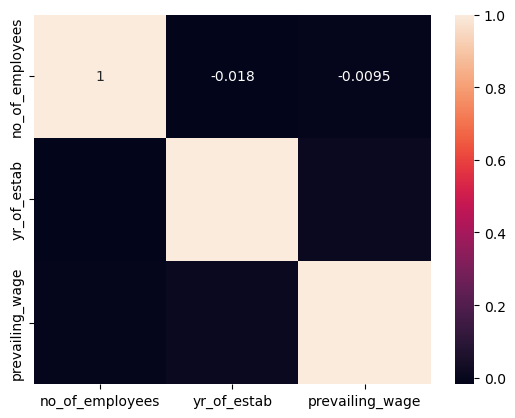

In [82]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

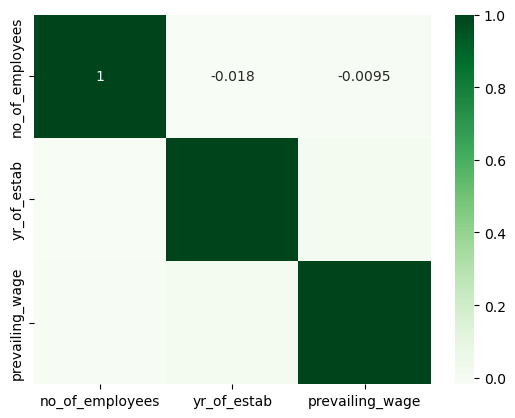

In [85]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='Greens')
plt.show()

- by seeing the graphs we might not say the relation status
- it is best practice get the percentage of relation using corellation
- all 3 columns having approximatly zero percentage of relation
- which indicates all the columns having no relation
- no-relation means indipendent to each other
- in ML we expect the input columns should be indipendent each other
- corr method gives 3*3 total 9 fields
- if a data has 20 columns then 20*20 total 400 fields
- thats why always go with Heat map visulaization